# Support Vector Machines
Support Vector Machines (SVM) are a method that uses parameter spaces to best separate classes or groups into two or more catagories in a hyper plane. Example, suppose you have pictures of cats and Tigers with differents distinuishable features, can you with some error of tolerance catagorize any given pictures in to any the two animals?

To study in detail about SVM, you can look at [Introduction to Support Vector Machines](http://docs.opencv.org/2.4/doc/tutorials/ml/introduction_to_svm/introduction_to_svm.html)

## SVM with Sci Kit Learn, Seaborn and Pandas for Data analysis and visualization

Now we are ready to practice the IPython code using Sci Kit Learn for machine learning and seaborn and pandas for data analysis and visualization. we will import module along the way when it is needed.

In [9]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

The breast cancer data is found on this website, [Breast Cancer Wisconsin (Diagnostic) Data Set](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). The data have 10 features and one target with two catagories. Let us open and preview it.

In [10]:
# public available  data, we use pandas to grab the data
breast_cancer = pd.read_csv('breast-cancer-wisconsin.data.txt',sep=',')
#assign names for the columns from the data description
breast_cancer.columns = [['ID', 'R', 'texture', 'C', 'Area', 'Smoothness',
                          'compactness', 'concavity','concave point', 'sym', 'fractal dimension']]

In [11]:
#preview the first five rows
breast_cancer.head()

,ID,R,texture,C,Area,Smoothness,compactness,concavity,concave point,sym,fractal dimension
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [12]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 0 to 697
Data columns (total 11 columns):
ID                   698 non-null int64
R                    698 non-null int64
texture              698 non-null int64
C                    698 non-null int64
Area                 698 non-null int64
Smoothness           698 non-null int64
compactness          698 non-null object
concavity            698 non-null int64
concave point        698 non-null int64
sym                  698 non-null int64
fractal dimension    698 non-null int64
dtypes: int64(10), object(1)
memory usage: 65.4+ KB


In [13]:
# We don't need the ID columns, it tells the specific experiment I guess
breast_cancer = breast_cancer.drop(['ID'],axis=1)
breast_cancer.head()

,R,texture,C,Area,Smoothness,compactness,concavity,concave point,sym,fractal dimension
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


The features, Radius(R), texture, symmetry, etc, are the tummor of the breast cencer.

In [14]:
breast_cancer['fractal dimension'].unique()

array([2, 4])

There are only two unique values.

/home/merzu/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


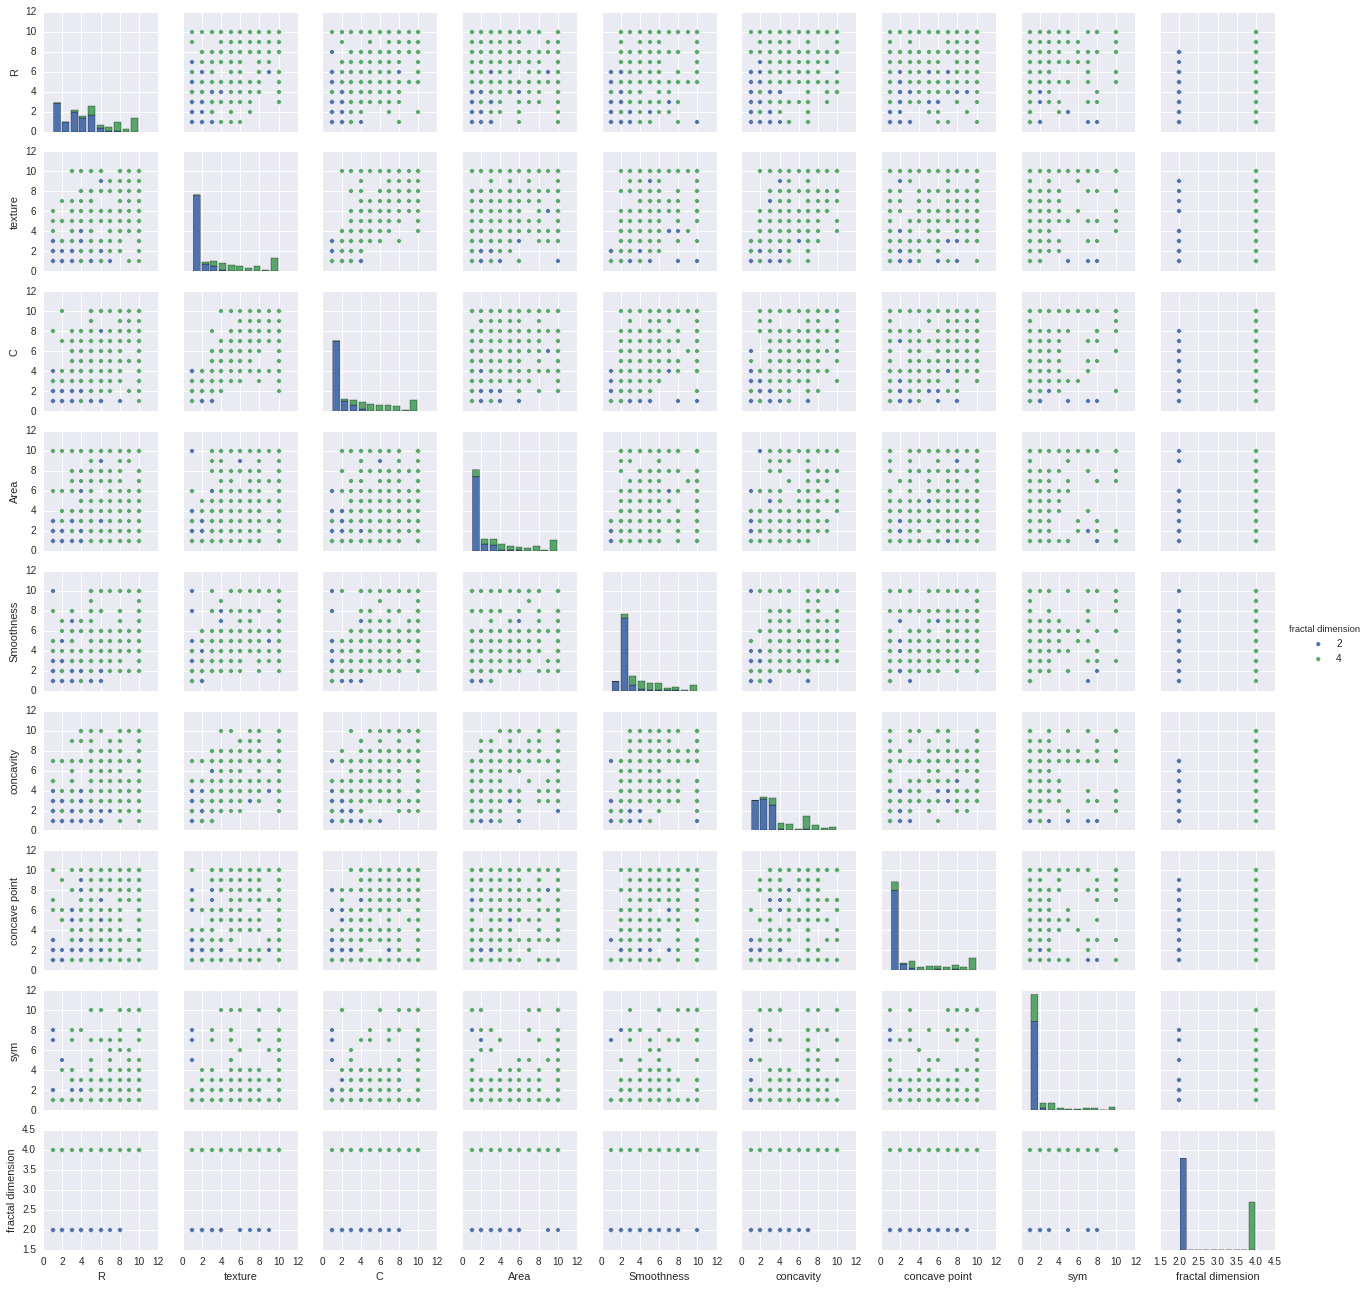

In [6]:
sns.pairplot(breast_cancer,size=2, hue = 'fractal dimension')

Lets add coloumn where we classfiy (assign) the data fractal dimension as either malignant or benign value. 
Lets define a function that classifies the number 2 and 4 either malignant and benign form of the breast cancer. 

In [26]:
def class_fun(num):
    if num==2:
        return 'Malignant'
    else:
        return 'benign'

this function retun either cancer 1 or 2 based on the value of name. lets apply it to fractal dimension column

In [27]:
breast_cancer['Type'] = breast_cancer['fractal dimension'].apply(class_fun)
breast_cancer.head()

,R,texture,C,Area,Smoothness,compactness,concavity,concave point,sym,fractal dimension,Type
0,5,4,4,5,7,10,3,2,1,2,Malignant
1,3,1,1,1,2,2,3,1,1,2,Malignant
2,6,8,8,1,3,4,3,7,1,2,Malignant
3,4,1,1,3,2,1,3,1,1,2,Malignant
4,8,10,10,8,7,10,9,7,1,4,benign


Some of the features do not correlate with any of the others. Not important for classiification at least form me 
here. Lets drop them from our dataframe. 


/home/merzu/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


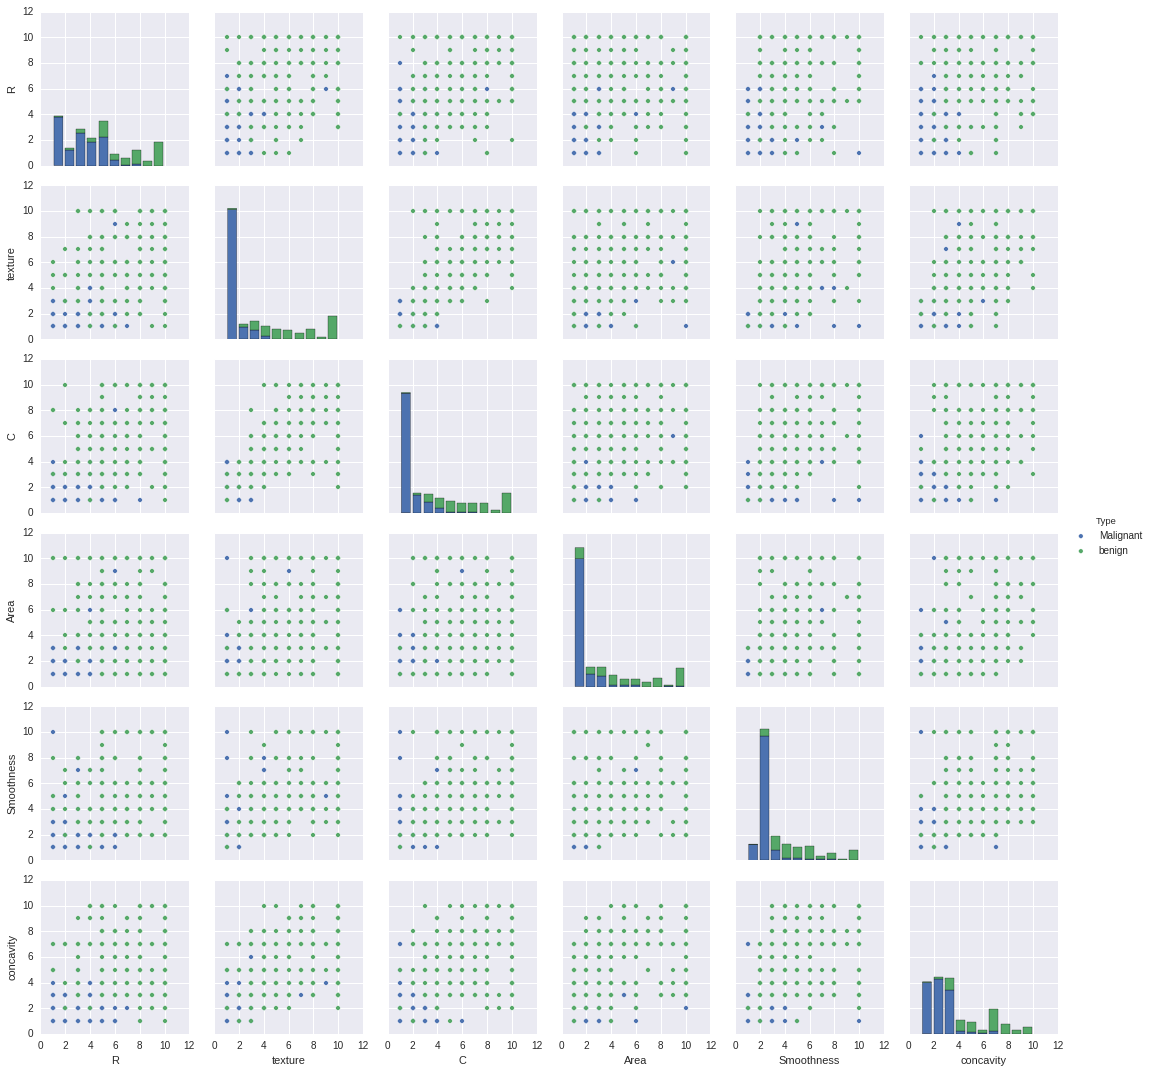

In [28]:
Drop = ['fractal dimension', 'sym', 'concave point'] 
sns.pairplot(breast_cancer.drop(Drop, axis=1), hue = 'Type')

In [15]:
# lets import Support Vector Machine module that can classifies the region into two in the parameter spaces
from sklearn.svm import SVC

Now we create a Support Vector Classification model for the data.

In [21]:
# Fit a SVM model to the data
model = SVC()

In [37]:
#Lets choose two correlated (x1, x2) features that can clearly distinguish our classes
x1 = 'R'
x2 = 'concavity'
y = 'fractal dimension' # the classes (malignant or benign breast cancer)
X =breast_cancer[[x1,x2]]
Y = breast_cancer[y]

Now we will randomly split our data (x1,x2, and y) for training and testing our our machine.

In [38]:
from sklearn.cross_validation import train_test_split
# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train.head() # previewin the data

,R,concavity
72,9,4
194,4,3
496,4,1
147,3,5
80,4,2


In [39]:
# Fit the model with training data
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Now lets get parameter how good our model to fit the data by comparing the prediction using the model and 
from the actual data we randomly peaked. 

In [75]:
from sklearn import metrics

# Get predictions using the testing data
predicted = model.predict(X_test)
# Actual data crospponding to the testing features
expected = Y_test

# Compare results
print metrics.accuracy_score(expected,predicted)

0.937142857143


This number tells us that our machine can correctely predict 93.7%. Lets use a different models (kernels) and compare the best classifier. For more explanation see [Plot different SVM classifiers in the iris dataset](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html)

In [61]:
# Import all SVM models to use for our models we will implement below 
from sklearn import svm

# SVM regularization parameter you change and see its effect
C = 1.0  

# SVC with a Linear Kernel  
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

# Gaussian Radial bassis function to construct the hyper plane of separation
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)

# SVC with 3rd degree poynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)

# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

We have different models fitted. Lets visualize the different modes and how they classify our data in two catagories.

First we create a mesh to plot in. We first create the minimum and the maximum x and y axis by the smallest and larget features by x1 and x2 values above. We numpy has a module for [mesh grid](http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).

In [62]:
# Set the step size of the mesh
h = 0.05

# X-axis min and max
x_min=X[x1].min() - 1
x_max =X[x1].max() + 1

# Y-axis min and max
y_min = X[x2].min() - 1
y_max = X[x2].max() + 1

# Finally, numpy can create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Now the plot titles

In [52]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial of degree 3 kernel']

Finally we will go through each model, set its position as a subplot, then scatter the data points and draw a countour of the decision boundaries. Note the two linear models are different. For good discussion,  you can visit this [website](http://stackoverflow.com/questions/33843981/under-what-parameters-are-svc-and-linearsvc-in-scikit-learn-equivalent)

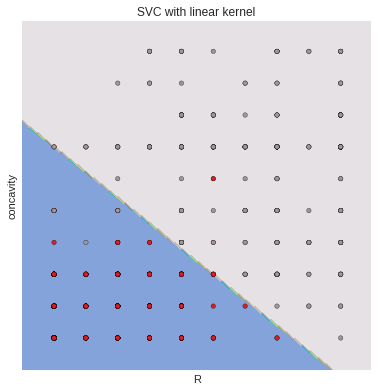

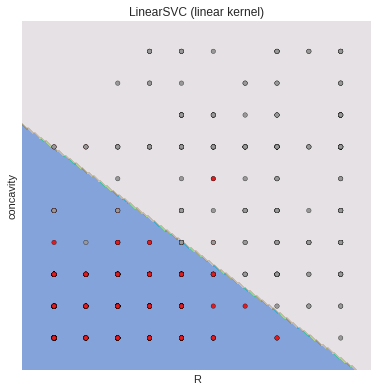

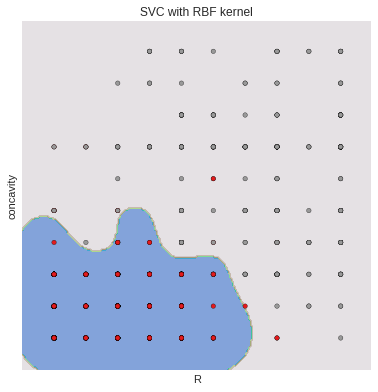

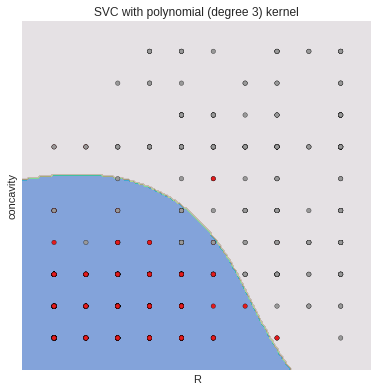

In [74]:
# Use enumerate for a count
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    plt.figure(figsize=(15,15))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i + 1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    #plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    #plt.scatter(X[x1], X[x2], c=Y, cmap=plt.cm.Dark2)
    plt.scatter(X[x1], X[x2], c=Y, cmap=plt.cm.Set1)
    
    # Labels and Titles
    plt.xlabel(x1)
    plt.ylabel(x2)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

It was shown that as the tumor size increases, breast cancer survival decreases [Reference](http://ww5.komen.org/BreastCancer/Table35Tumorsizeandbreastcancersurvival.html). I am assuming the region of 
the outter plots (dark white) are malignant and the inner small (blue) region is benign. Note we were Labelling incorrectly at the beginning the project analysis. 

Great practice! 